In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.shape

(1338, 7)

In [4]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
a=["sex","smoker","region"]
b=['age','bmi','children','charges']

male      676
female    662
Name: sex, dtype: int64


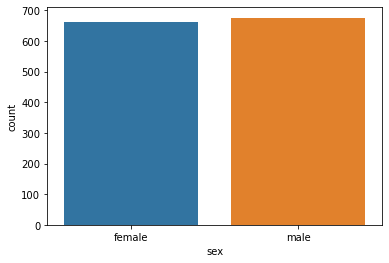

no     1064
yes     274
Name: smoker, dtype: int64


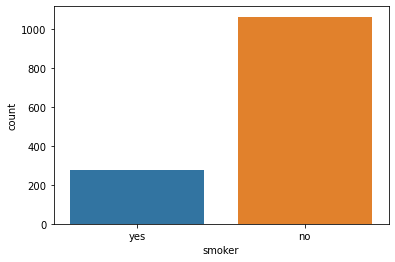

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


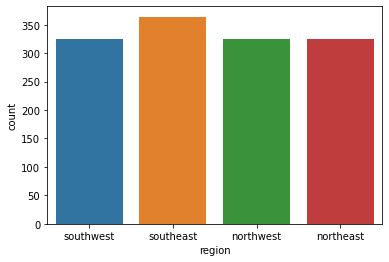

In [9]:
for i in a:
    print(df[i].value_counts())
    sns.countplot(x=i,data=df)
    plt.show()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
0.05567251565299186


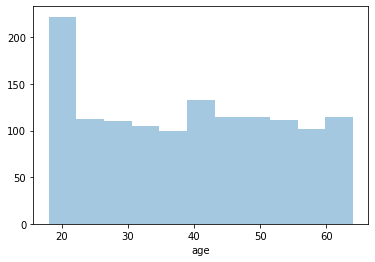

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
0.2840471105987448


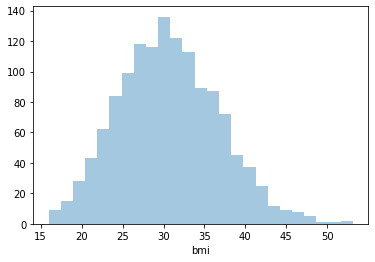

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
0.9383804401702414


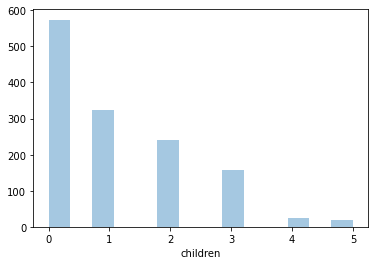

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
1.5158796580240388


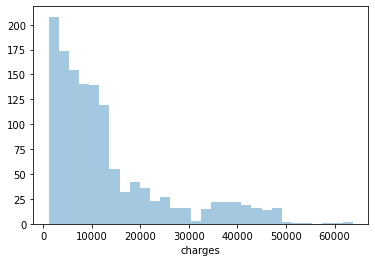

In [10]:
for i in b:
    sns.distplot(df[i],kde=False)
    print(df[i].describe())
    print(df[i].skew())
    plt.show()

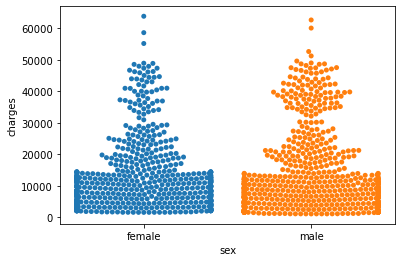

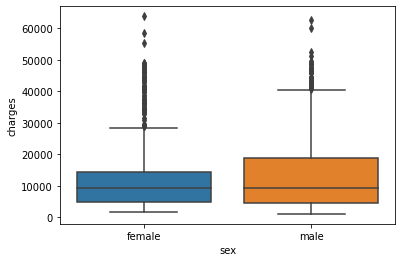

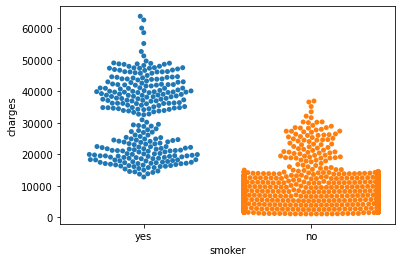

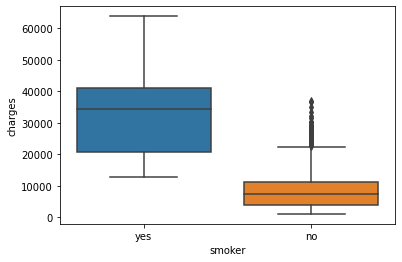

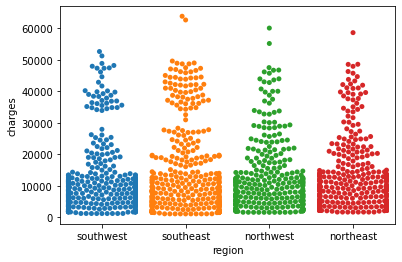

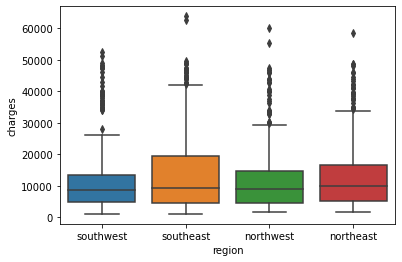

In [11]:
#bivariate Analysis
for i in a:
    sns.swarmplot(x=i,y="charges",data=df)
    plt.show()
    sns.boxplot(x=i,y="charges",data=df)
    plt.show()

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


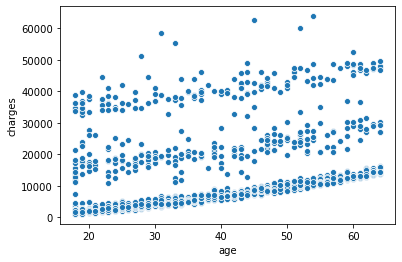

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


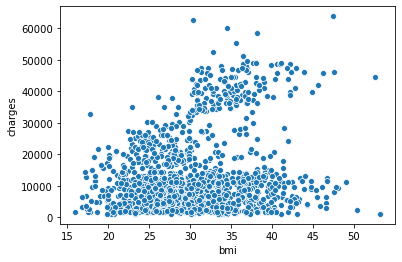

          children   charges
children  1.000000  0.067998
charges   0.067998  1.000000


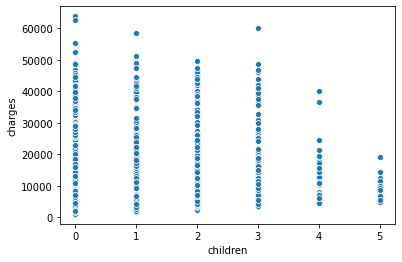

         charges  charges
charges      1.0      1.0
charges      1.0      1.0


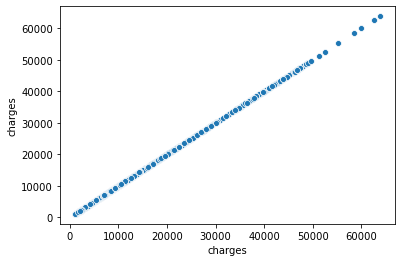

In [12]:
for i in b:
    sns.scatterplot(x=i,y="charges",data=df)
    print(df[[i,"charges"]].corr())
    plt.show()

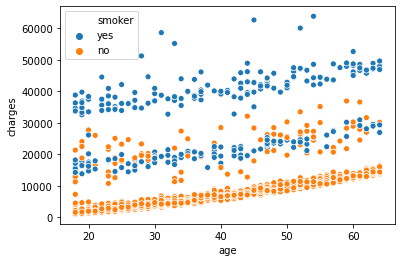

In [13]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=df)
plt.show()

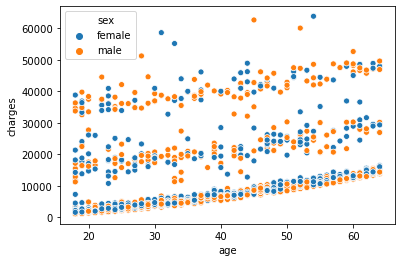

In [14]:
sns.scatterplot(x="age",y="charges",hue="sex",data=df)
plt.show()

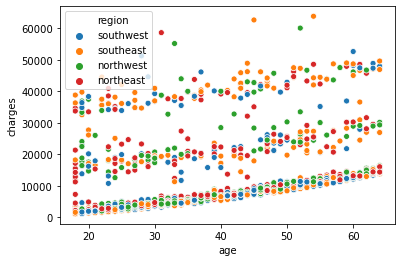

In [15]:
sns.scatterplot(x="age",y="charges",hue="region",data=df)
plt.show()

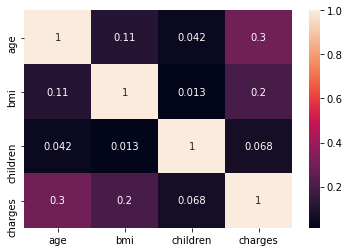

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

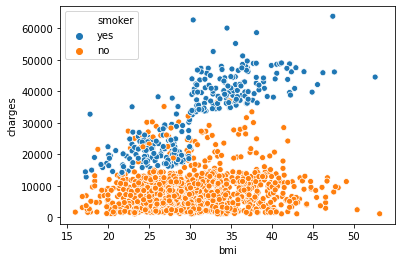

In [17]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)
plt.show()

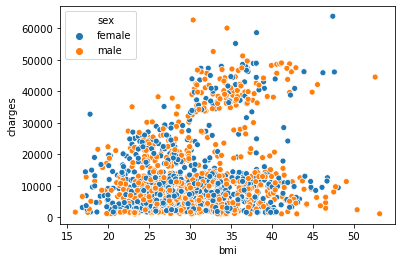

In [18]:
sns.scatterplot(x="bmi",y="charges",hue="sex",data=df)
plt.show()

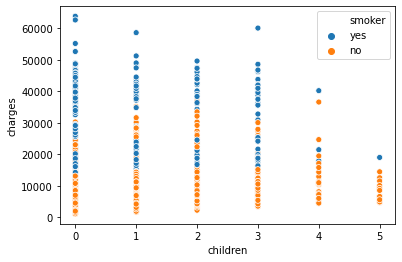

In [19]:
sns.scatterplot(x="children",y="charges",hue="smoker",data=df)
plt.show()

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
from sklearn.preprocessing import LabelEncoder
L1=LabelEncoder()
L2=LabelEncoder()
L3=LabelEncoder()
df["sex"]=L1.fit_transform(df['sex'])
df["smoker"]=L2.fit_transform(df['smoker'])
df["region"]=L3.fit_transform(df['region'])

In [22]:
print(L1.classes_)
print(L2.classes_)
print(L3.classes_)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
x=df.drop('charges',axis=1)
y=df['charges']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [25]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [27]:
algo=MLPRegressor(hidden_layer_sizes=(50,50),max_iter=2000,verbose=True)
algo.fit(xtrain,ytrain)

Iteration 1, loss = 158422144.12480959
Iteration 2, loss = 158326844.94362748
Iteration 3, loss = 158236261.61109051
Iteration 4, loss = 158150031.49382153
Iteration 5, loss = 158061568.79803738
Iteration 6, loss = 157962799.15041241
Iteration 7, loss = 157851157.14595795
Iteration 8, loss = 157718886.77788284
Iteration 9, loss = 157569787.42581478
Iteration 10, loss = 157386787.14815298
Iteration 11, loss = 157179478.93074495
Iteration 12, loss = 156936884.26999331
Iteration 13, loss = 156648776.33509198
Iteration 14, loss = 156308192.18420157
Iteration 15, loss = 155912831.83260974
Iteration 16, loss = 155459156.52187511
Iteration 17, loss = 154937551.00435296
Iteration 18, loss = 154335878.30561009
Iteration 19, loss = 153676496.54790598
Iteration 20, loss = 152927740.42317390
Iteration 21, loss = 152090960.49459451
Iteration 22, loss = 151150173.34492326
Iteration 23, loss = 150123753.89671540
Iteration 24, loss = 149022260.28755927
Iteration 25, loss = 147793902.73780560
Iteration

Iteration 207, loss = 62492162.47498406
Iteration 208, loss = 62483889.00009301
Iteration 209, loss = 62473637.65542032
Iteration 210, loss = 62468482.13920678
Iteration 211, loss = 62461100.56305202
Iteration 212, loss = 62451991.89057400
Iteration 213, loss = 62451202.81877600
Iteration 214, loss = 62433409.41114973
Iteration 215, loss = 62428022.45838083
Iteration 216, loss = 62417981.67403844
Iteration 217, loss = 62409276.88348859
Iteration 218, loss = 62401575.36535538
Iteration 219, loss = 62393606.55674367
Iteration 220, loss = 62385768.10957862
Iteration 221, loss = 62385910.76816405
Iteration 222, loss = 62369137.10318261
Iteration 223, loss = 62368362.92409674
Iteration 224, loss = 62350999.61926653
Iteration 225, loss = 62345417.28254148
Iteration 226, loss = 62334990.37972482
Iteration 227, loss = 62327860.63384853
Iteration 228, loss = 62318706.35084397
Iteration 229, loss = 62310483.09997741
Iteration 230, loss = 62301566.59024991
Iteration 231, loss = 62293857.19732764


Iteration 416, loss = 60154739.01547681
Iteration 417, loss = 60135728.17911730
Iteration 418, loss = 60123449.83375148
Iteration 419, loss = 60109406.69129021
Iteration 420, loss = 60085614.42965966
Iteration 421, loss = 60070750.36471788
Iteration 422, loss = 60050058.45756847
Iteration 423, loss = 60029418.98112267
Iteration 424, loss = 60028797.78978653
Iteration 425, loss = 60000971.17165852
Iteration 426, loss = 59980258.96446582
Iteration 427, loss = 59967221.28264594
Iteration 428, loss = 59943780.50202959
Iteration 429, loss = 59923738.51128239
Iteration 430, loss = 59906543.41415513
Iteration 431, loss = 59889853.97379293
Iteration 432, loss = 59869035.15218545
Iteration 433, loss = 59852623.73470561
Iteration 434, loss = 59834579.19739112
Iteration 435, loss = 59815052.70897579
Iteration 436, loss = 59802001.09023436
Iteration 437, loss = 59779370.55132543
Iteration 438, loss = 59753113.44077755
Iteration 439, loss = 59742659.27668314
Iteration 440, loss = 59721934.78724482


Iteration 628, loss = 52226298.66041030
Iteration 629, loss = 52149879.56772385
Iteration 630, loss = 52072468.02454836
Iteration 631, loss = 51995845.39405955
Iteration 632, loss = 51919138.74604521
Iteration 633, loss = 51835849.58220820
Iteration 634, loss = 51765356.74162116
Iteration 635, loss = 51680896.98015554
Iteration 636, loss = 51602079.00072961
Iteration 637, loss = 51520552.01964453
Iteration 638, loss = 51447057.29503160
Iteration 639, loss = 51354831.27419940
Iteration 640, loss = 51280183.21077869
Iteration 641, loss = 51197415.75085486
Iteration 642, loss = 51125708.88819113
Iteration 643, loss = 51048564.59742545
Iteration 644, loss = 50963566.14327260
Iteration 645, loss = 50868832.37571799
Iteration 646, loss = 50784078.30860929
Iteration 647, loss = 50706187.83150900
Iteration 648, loss = 50618374.24987434
Iteration 649, loss = 50534052.40405399
Iteration 650, loss = 50437193.47903144
Iteration 651, loss = 50355928.75587618
Iteration 652, loss = 50268390.12650425


Iteration 842, loss = 24960830.23034758
Iteration 843, loss = 24785021.73579967
Iteration 844, loss = 24662893.30048108
Iteration 845, loss = 24544907.07138007
Iteration 846, loss = 24439996.24240806
Iteration 847, loss = 24328746.98552973
Iteration 848, loss = 24208711.19295685
Iteration 849, loss = 24113097.95321000
Iteration 850, loss = 23997289.78372771
Iteration 851, loss = 23904463.05356187
Iteration 852, loss = 23793943.23738265
Iteration 853, loss = 23706326.26042577
Iteration 854, loss = 23558646.71649281
Iteration 855, loss = 23491097.08598967
Iteration 856, loss = 23368176.24856149
Iteration 857, loss = 23271511.59482298
Iteration 858, loss = 23162483.91899360
Iteration 859, loss = 23061892.39502439
Iteration 860, loss = 22957204.76632642
Iteration 861, loss = 22890752.67395237
Iteration 862, loss = 22793762.89117002
Iteration 863, loss = 22741782.41700114
Iteration 864, loss = 22596397.35613655
Iteration 865, loss = 22477174.22698707
Iteration 866, loss = 22410219.31278711


Iteration 1046, loss = 17294065.41337204
Iteration 1047, loss = 17299359.46658573
Iteration 1048, loss = 17280801.35318828
Iteration 1049, loss = 17271430.53282345
Iteration 1050, loss = 17264963.24794041
Iteration 1051, loss = 17259157.80187937
Iteration 1052, loss = 17251104.07246941
Iteration 1053, loss = 17247116.82100766
Iteration 1054, loss = 17225624.76316068
Iteration 1055, loss = 17235851.89121576
Iteration 1056, loss = 17210043.43756492
Iteration 1057, loss = 17221359.36341459
Iteration 1058, loss = 17192412.69208544
Iteration 1059, loss = 17212635.66594198
Iteration 1060, loss = 17194236.45628441
Iteration 1061, loss = 17179656.06132467
Iteration 1062, loss = 17167182.27459964
Iteration 1063, loss = 17174123.92436022
Iteration 1064, loss = 17156437.91121894
Iteration 1065, loss = 17140531.46334736
Iteration 1066, loss = 17159036.11886090
Iteration 1067, loss = 17147740.62821952
Iteration 1068, loss = 17130885.06693985
Iteration 1069, loss = 17117504.90724288
Iteration 1070, 

Iteration 1247, loss = 16087229.54815714
Iteration 1248, loss = 16079398.81625630
Iteration 1249, loss = 16070107.34380881
Iteration 1250, loss = 16069428.26725983
Iteration 1251, loss = 16063014.44508203
Iteration 1252, loss = 16060642.04989058
Iteration 1253, loss = 16063964.08185782
Iteration 1254, loss = 16055269.46500862
Iteration 1255, loss = 16052455.57389350
Iteration 1256, loss = 16060247.86868112
Iteration 1257, loss = 16034659.45622927
Iteration 1258, loss = 16057270.92645507
Iteration 1259, loss = 16055120.37552233
Iteration 1260, loss = 16071892.71197624
Iteration 1261, loss = 16015878.72047234
Iteration 1262, loss = 16018704.73900945
Iteration 1263, loss = 16025096.77732176
Iteration 1264, loss = 16008788.64894534
Iteration 1265, loss = 15999438.85125363
Iteration 1266, loss = 15987668.79534694
Iteration 1267, loss = 15990938.19235857
Iteration 1268, loss = 15994551.88753798
Iteration 1269, loss = 15993947.56279467
Iteration 1270, loss = 15980265.59543619
Iteration 1271, 

Iteration 1451, loss = 15249196.26489278
Iteration 1452, loss = 15235999.71925561
Iteration 1453, loss = 15243590.49635064
Iteration 1454, loss = 15229377.10647843
Iteration 1455, loss = 15231880.89627461
Iteration 1456, loss = 15223762.30602193
Iteration 1457, loss = 15226045.16587906
Iteration 1458, loss = 15215926.41934645
Iteration 1459, loss = 15211567.28913232
Iteration 1460, loss = 15211831.37027731
Iteration 1461, loss = 15201405.64391417
Iteration 1462, loss = 15215522.13840423
Iteration 1463, loss = 15213970.87506502
Iteration 1464, loss = 15193584.01828842
Iteration 1465, loss = 15192730.65858868
Iteration 1466, loss = 15203099.42175665
Iteration 1467, loss = 15195888.80089161
Iteration 1468, loss = 15203300.40689787
Iteration 1469, loss = 15186605.35252795
Iteration 1470, loss = 15168762.17437266
Iteration 1471, loss = 15180804.31899298
Iteration 1472, loss = 15170144.60280246
Iteration 1473, loss = 15163073.06598391
Iteration 1474, loss = 15175274.88058876
Iteration 1475, 

Iteration 1657, loss = 14613611.06579018
Iteration 1658, loss = 14610233.56707149
Iteration 1659, loss = 14606701.81155322
Iteration 1660, loss = 14604332.72596623
Iteration 1661, loss = 14615175.61098551
Iteration 1662, loss = 14600232.21588695
Iteration 1663, loss = 14605336.56965215
Iteration 1664, loss = 14599414.57514924
Iteration 1665, loss = 14608628.48483460
Iteration 1666, loss = 14595763.95815341
Iteration 1667, loss = 14599017.55192098
Iteration 1668, loss = 14585698.97105690
Iteration 1669, loss = 14581846.95462031
Iteration 1670, loss = 14582671.91928793
Iteration 1671, loss = 14575503.66546123
Iteration 1672, loss = 14587263.25154413
Iteration 1673, loss = 14588714.63958866
Iteration 1674, loss = 14586619.30184949
Iteration 1675, loss = 14585699.84636991
Iteration 1676, loss = 14562344.24743320
Iteration 1677, loss = 14581358.86922985
Iteration 1678, loss = 14577322.82627917
Iteration 1679, loss = 14578430.72581853
Iteration 1680, loss = 14566177.64156570
Iteration 1681, 

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=2000, verbose=True)

In [28]:
ypred=algo.predict(xtest)

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

3385.8240428044387
0.8125406387977195


In [30]:
algo2=LinearRegression()
algo2.fit(xtrain,ytrain)


LinearRegression()

In [31]:
ypred=algo2.predict(xtest)

In [32]:
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

4240.712304750555
0.7627140734360276


In [33]:
algo3=DecisionTreeRegressor()
algo3.fit(xtrain,ytrain)


DecisionTreeRegressor()

In [34]:
ypred=algo3.predict(xtest)
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))



3468.4075160447755
0.6746918724233497


In [35]:
new=np.array([[25,0,38.23,3,1,1]])
algo.predict(new)

array([37079.09476111])